#Priliminary

In [ ]:
!pip install pycalverter
!pip install pmdarima
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
  Created wheel for pycalverter: filename=pyCalverter-1.6.1-py3-none-any.whl size=4183 sha256=dba6f7f1ab584aaca0664b3c89feeab4800b7dab1012bad6777c2cc3c6739359
  Stored in directory: /root/.cache/pip/wheels/53/b8/3c/d8109c790d56e3f9d64d27f66e99c0c87763d6034af0a58af8
Successfully built pycalverter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
from calverter import Calverter
from datetime import datetime
###
# jalali_to_gregorian
def gregorian_to_jalali(year, month, day):
    """
    Converts a Gregorian date to Jalali.

    :param year: the year of the Gregorian date
    :param month: the month of the Gregorian date
    :param day: the day of the Gregorian date
    :return: a tuple (year, month, day) representing the equivalent Jalali date
    """
    converter = Calverter()
    julian_date = converter.gregorian_to_jd(year, month, day)
    j_tuple = converter.jd_to_jalali(julian_date)
    return j_tuple[0], j_tuple[1], j_tuple[2]


def jalali_to_gregorian(year, month, day):
    """
    Converts a Jalali date to Gregorian.

    :param year: the year of the Jalali date
    :param month: the month of the Jalali date
    :param day: the day of the Jalali date
    :return: a tuple (year, month, day) representing the equivalent Gregorian date
    """
    converter = Calverter()
    julian_date = converter.jalali_to_jd(year, month, day)
    g_tuple = converter.jd_to_gregorian(julian_date)
    return g_tuple[0], g_tuple[1], g_tuple[2]


def jalali_to_str(year, month, day, has_time, hour=0, minute=0):
    date = '{}/{}/{}'.format(year, month, day)
    if has_time:
        time = '{:02d}:{:02d}'.format(int(hour), int(minute))
        return date+' '+time
    return date


def str_to_jalali(string, hast_time):
    if string is None or string is '':
        return ''
    if not isinstance(string, str):
        string = str(string)
    if hast_time:
        date, time = string.split(' ')
        hour, minute = time.split(':')
    else:
        date = string
        hour, minute = None, None
    year, month, day = date.split('/')
    if hast_time:
        return year, month, day, hour, minute
    return year, month, day


def gregorian_to_str(year, month, day, hast_time, hour=0, minute=0):
    date = '{}-{}-{}'.format(year, month, day)
    if hast_time:
        time = '{:02d}:{:02d}'.format(int(hour), int(minute))
        return date+' '+time
    return date


def str_to_gregorian(string, hast_time):
    if string is None or string is '':
        return ''
    if not isinstance(string, str):
        string = str(string)
    if hast_time:
        date, time = string.split(' ')
        hour, minute = time.split(':')
    else:
        date = string
        hour, minute = None, None
    year, month, day = date.split('-')
    if hast_time:
        return year, month, day, hour, minute
    return year, month, day
###

###
# jalali_to_gregorian(year, month, day)
def _convert_str_to_date(date_str):
  year = int(date_str.split('-')[0])
  month = int(date_str.split('-')[1])
  day = int(date_str.split('-')[2])
  return year, month, day

# _convert_str_to_date('1360-06-01')
def _convert_to_miladi(year, month, day):
  miladi_year, miladi_month, miladi_day =jalali_to_gregorian(year=year, month=month, day=day)
  return datetime(year=miladi_year, month=miladi_month, day=miladi_day)

def miladi(ff):  #return is like:   miladi('1360-01-01')=datetime.datetime(1981, 3, 21, 0, 0)
  return _convert_to_miladi(_convert_str_to_date(ff)[0],_convert_str_to_date(ff)[1],_convert_str_to_date(ff)[2])

# for convert '1360-06-01' to miladi date time you just need to run :miladi('1360-06-01')
###

<>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:69: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:69: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-2-a645e5c52515>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if string is None or string is '':
<ipython-input-2-a645e5c52515>:69: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if string is None or string is '':


#Regression

In [ ]:
# Generate time series data
import pandas as pd
import numpy as np
economic_df=pd.read_csv("drive/My Drive/Master Thesis/Time Series Prediction/bfilimputation_df.csv")
date=pd.DataFrame({'Date':economic_df['Date']})
date=date['Date'].tolist()
date=np.array([miladi(t) for t in date])
time = np.array([np.datetime64(t) for t in date])       # Convert time to datetime format



In [ ]:
economic_df.head()

,Date,b2,b4,b5,b6,b7,b8,b9,b10,b14,b17,b18,B-23,B-24
0,1360-01-01,0.426947,0.513342,0.480741,0.449514,0.475996,0.525789,0.236034,0.549019,0.53136,0.334829,0.34548,0.356206,0.473286
1,1360-04-01,0.426947,0.513361,0.480648,0.449514,0.476092,0.525789,0.236296,0.549019,0.53136,0.335408,0.34548,0.356206,0.473286
2,1360-07-01,0.426947,0.513372,0.480703,0.449514,0.476092,0.525854,0.236172,0.549019,0.53136,0.335691,0.34548,0.356206,0.473286
3,1360-10-01,0.426947,0.513437,0.480597,0.449514,0.476284,0.525789,0.236259,0.549019,0.53136,0.336523,0.34548,0.356206,0.473286
4,1361-01-01,0.426947,0.513438,0.481167,0.449514,0.476284,0.525985,0.236376,0.550442,0.53136,0.336095,0.34548,0.356206,0.473286


R-squared (train): 0.8843847063230899
R-squared (test): -3.827706221171951
MSE (test): 0.7014245218445642
MAE (test): 0.7853042542243838
MAPE (test): 57.50458980121411


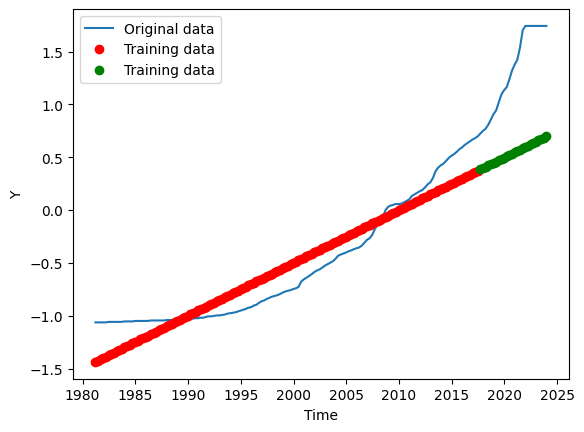

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#import the input variable; e.g. b1=eco_var
eco_var='logb18'    #determine which parameter do you want to predict
y_data=economic_df['{}'.format(eco_var)]
y_data=np.array(y_data.tolist())


# Split the time series into train and test sets
#without shuffling
split_ratio = 0.85  # Percentage of data for training (rest is for testing)
split_index = int(len(time) * split_ratio)

time_train, time_test = time[:split_index], time[split_index:]
y_train, y_test = y_data[:split_index], y_data[split_index:]

# Define the degree of the polynomial regression
degree =1

# Perform polynomial regression on the training data
coefficients = np.polyfit(time_train.astype(int), y_train, degree)
polynomial = np.poly1d(coefficients)


# Calculate R-squared for training set
y_train_pred = polynomial(time_train.astype(int))
r2 = r2_score(y_train, y_train_pred)

# Calculate MSE and MAE on test data
y_test_pred = polynomial(time_test.astype(int))
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for test set
r2test = r2_score(y_test, y_test_pred)
# Calculate MAPE on test data
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the evaluation metrics
print("R-squared (train):", r2)
print("R-squared (test):", r2test)
print("MSE (test):", mse)
print("MAE (test):", mae)
print("MAPE (test):", mape)

# Plot the original time series, training data, and forecast
plt.plot(time, y_data, label='Original data')
plt.plot(time_train, y_train_pred, 'ro', label='Training data')
plt.plot(time_test, y_test_pred, 'go', label='Training data')
# plt.plot(time_forecast, y_forecast, 'g', label='Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

#Result
Result=[y for y in y_train_pred]
for y in y_test_pred:
  Result.append(y)


2
R-squared (train): 0.9969717087453083
R-squared (test): 0.7426060237416046
MSE (test): 0.037397148552856335
MAE (test): 0.15813071318344196
MAPE (test): 11.109569030908903


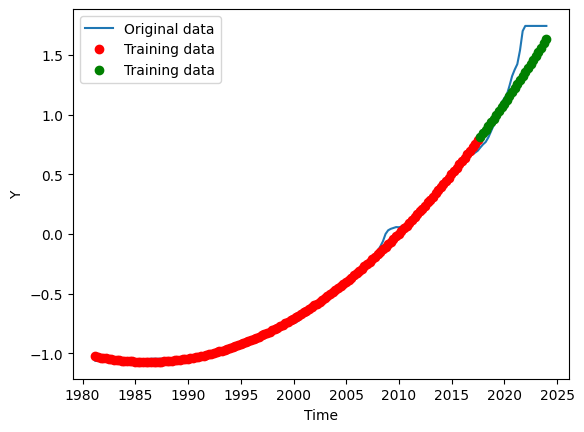

In [ ]:
#Find the best polynomial degree for each feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#LOOP FOR FIND BEST POLYNOMIAL DEGREE
eco_var='logb18'    #determine which parameter do you want to predict
economic_df=pd.read_csv("drive/My Drive/Master Thesis/Time Series Prediction/bfilImputation.csv")
economic_df.head()
y_data=economic_df['{}'.format(eco_var)]
y_data=np.array(y_data.tolist())

#without shuffling(correct)
split_ratio = 0.85  # Percentage of data for training (rest is for testing)
split_index = int(len(time) * split_ratio)

time_train, time_test = time[:split_index], time[split_index:]
y_train, y_test = y_data[:split_index], y_data[split_index:]

# Define the degree of the polynomial regression
max_r2=[]
for d in range(1,11):
  degree = d

  # Perform polynomial regression on the training data
  coefficients = np.polyfit(time_train.astype(int), y_train, degree)
  polynomial = np.poly1d(coefficients)
  # Calculate R-squared for test set
  y_test_pred = polynomial(time_test.astype(int))
  r2test = r2_score(y_test, y_test_pred)
  max_r2.append((r2test,d))

print(max(max_r2)[1])

# APPLY POLY ON MAX R^2 DEGREE
mdegree =max(max_r2)[1]

# Perform polynomial regression on the training data
coefficients = np.polyfit(time_train.astype(int), y_train, mdegree)
polynomial = np.poly1d(coefficients)

# Calculate R-squared for training set
y_train_pred = polynomial(time_train.astype(int))
r2 = r2_score(y_train, y_train_pred)

# Calculate MSE and MAE on test data
y_test_pred = polynomial(time_test.astype(int))
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for test set
r2test = r2_score(y_test, y_test_pred)
# Calculate MAPE on test data
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the evaluation metrics
print("R-squared (train):", r2)
print("R-squared (test):", r2test)
print("MSE (test):", mse)
print("MAE (test):", mae)
print("MAPE (test):", mape)

# Plot the original time series, training data, and forecast
plt.plot(time, y_data, label='Original data')
plt.plot(time_train, y_train_pred, 'ro', label='Training data')
plt.plot(time_test, y_test_pred, 'go', label='Training data')
# plt.plot(time_forecast, y_forecast, 'g', label='Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

In [ ]:
#Result
Result=[y for y in y_train_pred]
for y in y_test_pred:
  Result.append(y)

# print(len(Result))
Result_df=pd.DataFrame({'Result':Result})

# Result_df
Result_df.head()
Result_df.to_csv('Result_{}.csv'.format(eco_var),index=False)
files.download('Result_{}.csv'.format(eco_var))


[-0.5522128525704613, 0.6581901268853061, -0.5051215700955387, 0.2669711602476088, 0.5309655725431748, -0.09031058408142112, -0.80314549382829, -0.28361545239097374, -0.023073005418550174, -1.04534208367616, -0.11944238282444442, -0.5487286780747693, 0.7174782991356117, -0.039710556438998346, -0.561712666659469, -0.046214368235131253, 0.7153051972339544, 0.4614764398043354, -0.2545132927162008, 0.7124581787451354, 0.7084769738357961, 0.13921655086632345, -0.6565665422767086, -1.1280467829897898, -0.13533022483568757, -0.4871077797062515, 0.49609831905185775, -0.5536223404058846, -0.5268207415120516, 0.6889916269527077, -0.5350562285684397, -0.5163334898308287, 0.6306614479314163, 0.2511748402529177, 0.20616564226872391, 0.3165091494025347, -0.534385724599411, 0.5635264114387457, 0.35979155341036684, -0.8823695388332427, -1.3991809570332183, 0.1461305280722387, -0.4487602175438248, 0.5140926702342252, 0.3385642824438362, -0.1994637643799102, 0.06865777537756568, -0.5608947042014529, 0.7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>